# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Primeiro caso de teste

In [40]:
#funcao
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


In [41]:
#população inicial (primeira geração)
n_pop = 10
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[0.53826494, 0.92971806, 0.53254859],
       [0.30411939, 0.99090181, 0.01710193],
       [0.75999974, 0.15348794, 0.18836606],
       [0.84525956, 0.44947645, 0.14976904],
       [0.6878369 , 0.57271967, 0.13677911],
       [0.3504367 , 0.69184519, 0.96001337],
       [0.15410843, 0.7624096 , 0.12503918],
       [0.45885952, 0.88844738, 0.76421261],
       [0.55580479, 0.13623878, 0.37930994],
       [0.40850619, 0.21830931, 0.15516412]])

In [42]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[ 0.22958964,  3.57830834,  3.19529156],
       [-1.17528367,  3.94541085,  0.10261156],
       [ 1.55999844, -1.07907236,  1.13019635],
       [ 2.07155736,  0.69685868,  0.89861423],
       [ 1.12702139,  1.436318  ,  0.82067466],
       [-0.89737979,  2.15107112,  5.76008021],
       [-2.07534941,  2.57445762,  0.75023505],
       [-0.2468429 ,  3.33068431,  4.58527567],
       [ 0.33482873, -1.1825673 ,  2.27585962],
       [-0.54896286, -0.69014415,  0.93098472]])

In [43]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[ 2.29589638e-01,  3.57830834e+00,  3.19529156e+00,
         5.69006293e+01],
       [-1.17528367e+00,  3.94541085e+00,  1.02611561e-01,
         3.74856850e+02],
       [ 1.55999844e+00, -1.07907236e+00,  1.13019635e+00,
         2.97634685e+02],
       [ 2.07155736e+00,  6.96858677e-01,  8.98614226e-01,
         1.77920563e+02],
       [ 1.12702139e+00,  1.43631800e+00,  8.20674663e-01,
         1.48999860e+02],
       [-8.97379787e-01,  2.15107112e+00,  5.76008021e+00,
         2.64998232e+02],
       [-2.07534941e+00,  2.57445762e+00,  7.50235052e-01,
         2.53021041e+02],
       [-2.46842902e-01,  3.33068431e+00,  4.58527567e+00,
         1.26353555e+02],
       [ 3.34828735e-01, -1.18256730e+00,  2.27585962e+00,
         2.22730600e+02],
       [-5.48962857e-01, -6.90144152e-01,  9.30984716e-01,
         2.97155098e+02]])

In [44]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[ 2.29589638e-01,  3.57830834e+00,  3.19529156e+00,
         5.69006293e+01],
       [-2.46842902e-01,  3.33068431e+00,  4.58527567e+00,
         1.26353555e+02],
       [ 1.12702139e+00,  1.43631800e+00,  8.20674663e-01,
         1.48999860e+02],
       [ 2.07155736e+00,  6.96858677e-01,  8.98614226e-01,
         1.77920563e+02],
       [ 3.34828735e-01, -1.18256730e+00,  2.27585962e+00,
         2.22730600e+02],
       [-2.07534941e+00,  2.57445762e+00,  7.50235052e-01,
         2.53021041e+02],
       [-8.97379787e-01,  2.15107112e+00,  5.76008021e+00,
         2.64998232e+02],
       [-5.48962857e-01, -6.90144152e-01,  9.30984716e-01,
         2.97155098e+02],
       [ 1.55999844e+00, -1.07907236e+00,  1.13019635e+00,
         2.97634685e+02],
       [-1.17528367e+00,  3.94541085e+00,  1.02611561e-01,
         3.74856850e+02]])

In [45]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[  0.22958964,   3.57830834,   3.19529156,  56.90062927],
       [ -0.2468429 ,   3.33068431,   4.58527567, 126.35355498],
       [  1.12702139,   1.436318  ,   0.82067466, 148.99985999],
       [  2.07155736,   0.69685868,   0.89861423, 177.92056303],
       [  0.33482873,  -1.1825673 ,   2.27585962, 222.73059981]])

In [46]:
#contagem de população estagnada
cont = 0
delta = 0.01

In [49]:
sem_evoluir = 100
i_desejadas = 10
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao >= delta:
                cont=0

            elif evolucao == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)
    #print('Número de iterações para a convergência: ',i)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioInf = media - desvioP
desvioSup = media + desvioP

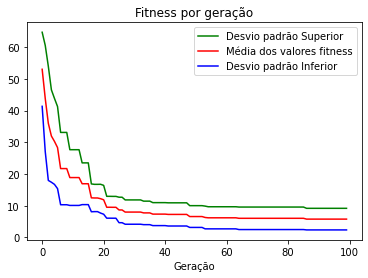

In [50]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("")
plt.plot(desvioSup, color = "green", label = "Desvio padrão Superior")
plt.plot(media, color = "red", label = "Média dos valores fitness")
plt.plot(desvioInf, color = "blue", label = "Desvio padrão Inferior")
plt.legend()
plt.show()

[Início](#Índice)

## Segundo caso de teste

In [245]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [246]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [247]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [248]:
#palavra aleatoria
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([123.14204659, 124.66372597, 112.70818473,  75.87812399,
         93.13742765, 116.42585792,  58.04078175,  97.310226  ,
         57.58014596,  73.02834668,  82.96968783,  66.37227796,
        103.18725135,  95.39916421,  67.93183428, 111.96823018,
         81.92653361,  67.05302893,  78.284241  , 120.80087755,
         91.18095435,  69.82770794,  84.53435777,  77.32086001,
        124.20021176,  75.29500427,  76.09101225,  79.94494185,
         77.81881445,  92.77317543])]

In [249]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[ 123.14204659, 4983.6606033 ],
       [ 124.66372597, 5200.82216519],
       [ 112.70818473, 3619.36814848],
       [  75.87812399,  544.34134685],
       [  93.13742765, 1647.58281705],
       [ 116.42585792, 4080.50848903],
       [  58.04078175,   30.18163789],
       [  97.310226  , 2003.74640158],
       [  57.58014596,   25.3325583 ],
       [  73.02834668,  419.48556164],
       [  82.96968783,  925.53993478],
       [  66.37227796,  191.13831064],
       [ 103.18725135, 2564.43505682],
       [  95.39916421, 1836.30797786],
       [  67.93183428,  236.69312571],
       [ 111.96823018, 3530.88259602],
       [  81.92653361,  863.15699507],
       [  67.05302893,  210.42487521],
       [  78.284241  ,  662.40557425],
       [ 120.80087755, 4658.59180021],
       [  91.18095435, 1492.58242841],
       [  69.82770794,  298.6228669 ],
       [  84.53435777, 1023.19105693],
       [  77.32086001,  613.74413999],
       [ 124.20021176, 5134.18275494],
       [  75.29500427,  5

In [250]:
#ordenar
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra

array([[ 57.58014596,  25.3325583 ],
       [ 58.04078175,  30.18163789],
       [ 66.37227796, 191.13831064],
       [ 67.05302893, 210.42487521],
       [ 67.93183428, 236.69312571],
       [ 69.82770794, 298.6228669 ],
       [ 73.02834668, 419.48556164],
       [ 75.29500427, 517.47169824],
       [ 75.87812399, 544.34134685],
       [ 76.09101225, 554.32051268],
       [ 77.32086001, 613.74413999],
       [ 77.81881445, 638.66460551],
       [ 78.284241  , 662.40557425],
       [ 79.94494185, 750.64721771],
       [ 81.92653361, 863.15699507]])

In [ ]:
#contagem de geração estagnada
cont_2 = 0
delta_2 = 0.01

[Início](#Índice)<br>

## Terceiro caso de teste

In [252]:
#função rastrigin
def rastrigin(x):
    return 10 * len(x) + sum(i * i - 10 * cos(2 * pi * i) for i in x)